## Import libraries and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

pd.options.display.max_colwidth = 150
plt.style.use('ggplot')

## EDA

In [2]:
train_df.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I ...",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits in...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the tools well. · talk """,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,"Your vandalism to the Matt Shirvington article has been reverted. Please don't do it again, or you will be banned.",0,0,0,0,0,0
8,00037261f536c51d,"Sorry if the word 'nonsense' was offensive to you. Anyway, I'm not intending to write anything in the article(wow they would jump on me for vandal...",0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contrary to those of DuLithgow,0,0,0,0,0,0


In [3]:
train_df['comment_text'].tail(20)

159551    While about half the references are from BYU-I, the majority comes from the independent student paper Scroll, which probably is the most reliable ...
159552                                                           Prague Spring \n\nI think that Prague Spring deserves more than two sentences in this article.
159553    I see this as having been merged; undoing one side of a merge forks content in large blocks. See here and here where the article was merged. The p...
159554    and i'm going to keep posting the stuff u deleted until this fucking site closes down have fun u stupid ass bitch don't ever delete anything fucki...
159555                                "\n\nHow come when you download that MP3 it's titled ""odb""? That's ODB's theme and that has been my point all along.  "
159556                                                                                                I'll be on IRC, too, if you have a more specific request.
159557    It is my opinion that that hap

<BarContainer object of 2 artists>

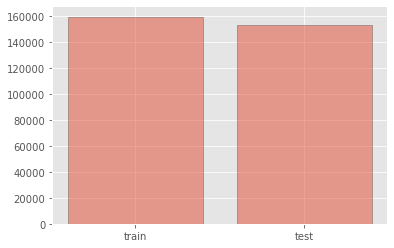

In [4]:
plt.bar(['train', 'test'], [train_df.shape[0], test_df.shape[0]], alpha = 0.5, edgecolor = 'black')

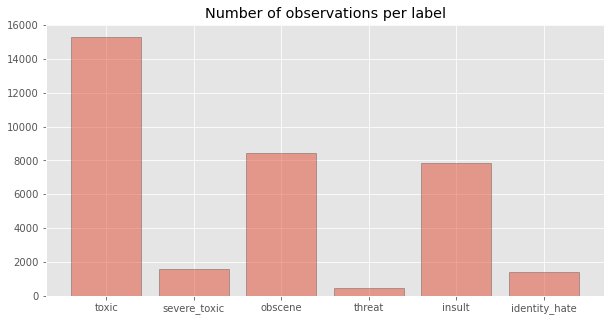

In [5]:
label_columns = train_df.columns[2:]
label_count = []

for column in label_columns:
    label_count.append(train_df[column].sum())

plt.figure(figsize = (10, 5))
plt.bar(label_columns, label_count, alpha = 0.5, edgecolor = 'black')
plt.title('Number of observations per label')
plt.show()

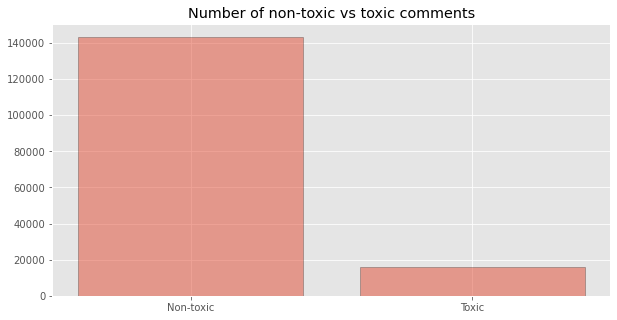

In [31]:
nontoxic_indices = train_df[label_columns].apply(lambda row : True if (row.sum() == 0) else False, 1) # Get non-toxic observations 
nontoxic_no = train_df[nontoxic_indices].shape[0]
toxic_no = train_df.shape[0] - nontoxic_no

plt.figure(figsize = (10, 5))
plt.bar(['Non-toxic', 'Toxic'], [nontoxic_no, toxic_no], alpha = 0.5, edgecolor = 'black')
plt.title('Number of non-toxic vs toxic comments')
plt.show()